98 98


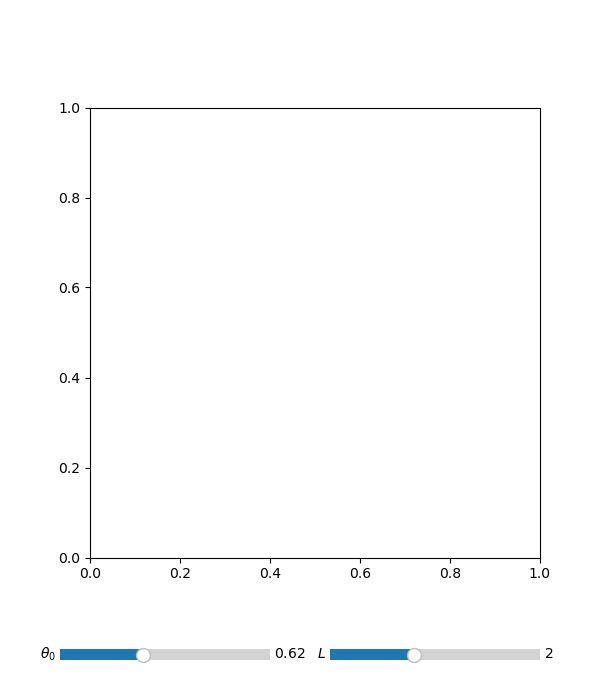

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from matplotlib.widgets import Slider
def F(t, pos, vel, params):
    return np.array([-params['m']*params['g']*np.cos(pos[0])*params['L']/2])

# RK4
def f(t, z, params):
  return np.array([z[1], F(t, z[0], z[1], params)/params['I']])

def Step(t, pos, vel, params):
  z = np.array([pos, vel])
  k1 = f(t, np.array([pos, vel]), params)
  k2 = f(t + params['dt']/2, z + params['dt'] * k1/2, params)
  k3 = f(t + params['dt']/2, z + params['dt'] * k2/2, params)
  k4 = f(t + params['dt'], z + params['dt'] * k3, params)
  new_t = t + params['dt']
  new_z = z + params['dt']/6 * (k1 + 2*k2 + 2*k3 + k4)
  return new_t, new_z[0], new_z[1]

def F2(t, pos, vel, params):
  return np.array([-params['m']*params['g']])

# RK4
def f2(t, z, params):
  return np.array([z[1], F2(t, z[0], z[1], params)/params['m']])

def Step2(t, pos, vel, params):
  z = np.array([pos, vel])
  k1 = f2(t, np.array([pos, vel]), params)
  k2 = f2(t + params['dt']/2, z + params['dt'] * k1/2, params)
  k3 = f2(t + params['dt']/2, z + params['dt'] * k2/2, params)
  k4 = f2(t + params['dt'], z + params['dt'] * k3, params)
  new_t = t + params['dt']
  new_z = z + params['dt']/6 * (k1 + 2*k2 + 2*k3 + k4)
  return new_t, new_z[0], new_z[1]

# new code
def Pendulum(params):
  ts = []
  rs = []
  vs = []
  t = 0.0
  pos = params["r0"]
  vel = params["v0"]
  while ((t < params['T']) & (pos>0)):
    t, pos, vel = Step(t, pos, vel, params)
    
    ts.append(t)
    rs.append(pos)
    vs.append(vel)
  return np.array(ts), np.array(rs), np.array(vs)
def FreeFall(params):
    ts = []
    rs = []
    vs = []
    t = 0.0
    pos = np.sin(params["r0"])*params['L']
    vel = params["v0"]
    while ((t < params['T']) & (pos>0)):
        t, pos, vel = Step2(t, pos, vel, params)
        
        ts.append(t)
        rs.append(pos)
        vs.append(vel)
    return np.array(ts), np.array(rs), np.array(vs)

w = np.arccos(np.sqrt(2/3))
r = 2



param = {'m': 1.0,
         'dt': 0.005,
         'g': 9.8,
         'T': 10.0,
         'L': r,
         'I' : 0,
         'r0': np.array([w]),
         'v0': np.array([0.0])}
param['I'] = param['m']*(param['L']**2)/3
times, positions, velocities = Pendulum(param)


times2, positions2, velocities2 = FreeFall(param)


if (len(times)<len(times2)):
    for i in range(len(times2)-len(times)):
        positions = np.insert(positions,-1,positions[-1])
        times = np.insert(times,-1,times[-1])
        velocities = np.insert(velocities,-1,velocities[-1])
if(len(times2)<len(times)):
    for i in range(len(times)-len(times2)):
        positions2 = np.insert(positions2,-1,positions2[-1])
        times2 = np.insert(times2,-1,times2[-1])
        velocities2 = np.insert(velocities2,-1,velocities2[-1])
old_L = param['L']
old_r0 = param['r0']



fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, position=[.15,.15,.75,.75] )
# ax.grid()




# orbit
orb, = ax.plot([], [],'-', color = "g")
ball, = ax.plot([], [],'o', color = "r")
init_orb, = ax.plot([], [],'-', color = "b")
# time
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    ax.plot([0], ms=7, c='k',marker='o')
    # orb.set_data([0,r*np.cos(positions[t])],[0,r*np.sin(positions[t])])
    
def verify(L,r0):
    global old_L, old_r0, param, times, positions, velocities, times2, positions2, velocities2
    if(old_L!=L or old_r0!=r0):
        old_L = L
        
        param['L'] = L
        param['r0'] = np.array([r0])
        old_r0 = param['r0']
        param['I'] = param['m']*(param['L']**2)/3

        times, positions, velocities = Pendulum(param)
        times2, positions2, velocities2 = FreeFall(param)
        if (len(times)<len(times2)):
            for i in range(len(times2)-len(times)):
                positions = np.insert(positions,-1,positions[-1])
                times = np.insert(times,-1,times[-1])
                velocities = np.insert(velocities,-1,velocities[-1])
        if(len(times2)<len(times)):
            for i in range(len(times)-len(times2)):
                positions2 = np.insert(positions2,-1,positions2[-1])
                times2 = np.insert(times2,-1,times2[-1])
                velocities2 = np.insert(velocities2,-1,velocities2[-1])
print(len(times),len(times2))
def update(t):
    global r, w, param, times, positions, velocities, times2, positions2, velocities2
    w = s_w.val
    r = s_r.val
    ax.set_xlim(-(r)*0.051, (r)*1.51)
    ax.set_ylim(-(r)*0.051, (r)*1.51)  
    verify(r,w)
    # x,y = positions(t)
    # x_e = []
    # y_e = []
    # x_e.append(x)
    # y_e.append(y)
    # traj_e.set_data(x_e[-M:-1], y_e[-M:-1])
    # print(len(times))
    positions = positions.flatten()
    positions2 = positions2.flatten()
    if(t<len(times)):
        init_orb.set_data([0,r*np.cos(positions[0])],[0,r*np.sin(positions[0])])
        orb.set_data([0,r*np.cos(positions[t])],[0,r*np.sin(positions[t])])
        ball.set_data([r*np.cos(positions[0])],[positions2[t]])
    # e.set_data(x, y)

        time_text.set_text('time = %.2f' % times[t])
    return orb, init_orb

ax_w = plt.axes([0.1, 0.05, 0.35, 0.03])#, facecolor=axcolor)
ax_r = plt.axes([0.55, 0.05, 0.35, 0.03])#, facecolor=axcolor)

s_w = Slider(ax_w, r'$\theta_0$', 0, np.pi/2, valinit=w, valstep=0.01)
s_r = Slider(ax_r, r'$L$', 0, 5, valinit=r, valstep=0.2)
s_w.on_changed(update)
s_r.on_changed(update)

def anim():
    # fig.canvas.draw_idle()
    global times
    return FuncAnimation(fig, update, frames=int(len(times)),#np.linspace(0, T_final, T_final*fps),
                         blit=True, interval=30)

anim()

In [ ]:
fig,ax = plt.subplots(figsize=(6,7))
ax.plot(times,positions)
plt.show()

In [ ]:
times2[-1]**2*param['g']*0.5-param['L']*np.sin(param['r0'])

In [ ]:
np.deg2rad(90)


In [2]:
np.rad2deg(np.arccos(np.sqrt(2/3)))

35.264389682754654

In [ ]:
np.cos(np.deg2rad(35.264389682754654))**2

In [3]:
np.sqrt(2/3)

0.816496580927726